<a href="https://colab.research.google.com/github/Samar2411/Python_Paper_Airplanes/blob/main/Copy_of_Week_10_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 10 : Image Processing Part 1**
## **Goal**
The goal of this lab is to get familiar with images and python packages to manipulate them. 

## **Tools**
We will use functions from the image processing toolkit [CV2]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab import files 

## **Load Image**



In [ ]:
uploaded = files.upload()

NameError: ignored

In [ ]:
prism = cv2.imread('Prism.jpeg')

In [ ]:
type(prism)

numpy.ndarray

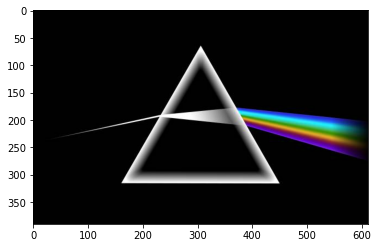

In [ ]:
plt.imshow(prism)

Matplotlib has a red green blue color scheme while OpenCV has a blue green red color scheme. 

cvtColor allows you to switch between color schemes. 

In [ ]:
prism = cv2.cvtColor(prism, cv2.COLOR_BGR2RGB)

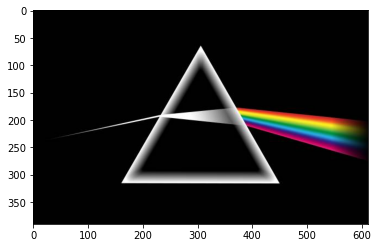

In [ ]:
plt.imshow(prism)

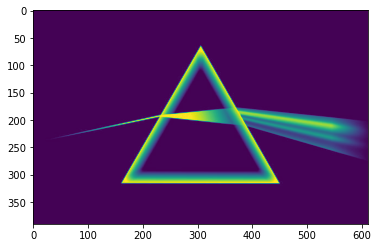

In [ ]:
prism_gray = cv2.imread('Prism.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(prism_gray)

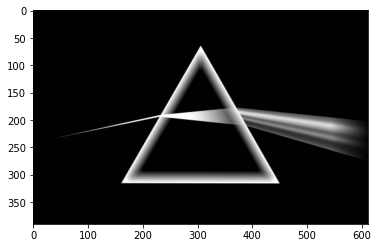

In [ ]:
plt.imshow(prism_gray, cmap = 'gray')

In [ ]:
prism_gray.shape

(390, 612)

### **Reshape Image**

In [ ]:
prism.shape

(390, 612)

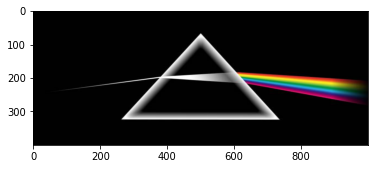

In [ ]:
prism2 = cv2.resize(prism, (1000,400))
plt.imshow(prism2,cmap = 'gray')

#Why we dont use cv2.imshow

In [ ]:
cv2.imshow(prism)

DisabledFunctionError: ignored

# Drawing Shapes on Images

We can draw rectangles and circles for reference. 

The pt1 argument is the top left corner and the pt2 argument is the  bottom right corner. The first number in the parenthesis is the x axis and the second is the y axis.

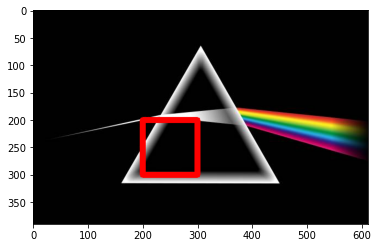

In [ ]:
cv2.rectangle(prism, pt1 = (200,200), pt2 = (300,300), color = (255,0, 0),thickness = 10)
plt.imshow(prism)

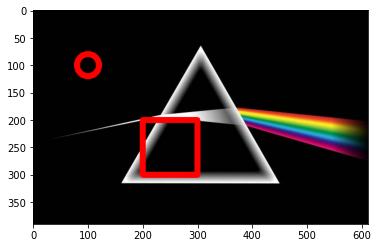

In [ ]:
cv2.circle(prism, center = (100,100), radius = 20, color = (255, 0 , 0), thickness = 10)
plt.imshow(prism,cmap = 'gray')

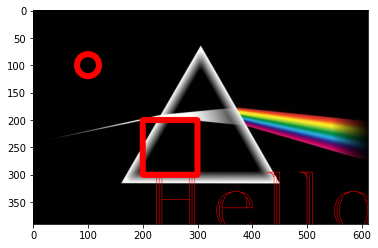

In [ ]:
cv2.putText(prism, text = 'Hello', org = (200,400), fontFace = 4, fontScale = 5, color = (255,0,0))
plt.imshow(prism,cmap = 'gray')

### **Monochromatic vs 3 Color Images**

When you read in a grayscale image, it is an array with values.

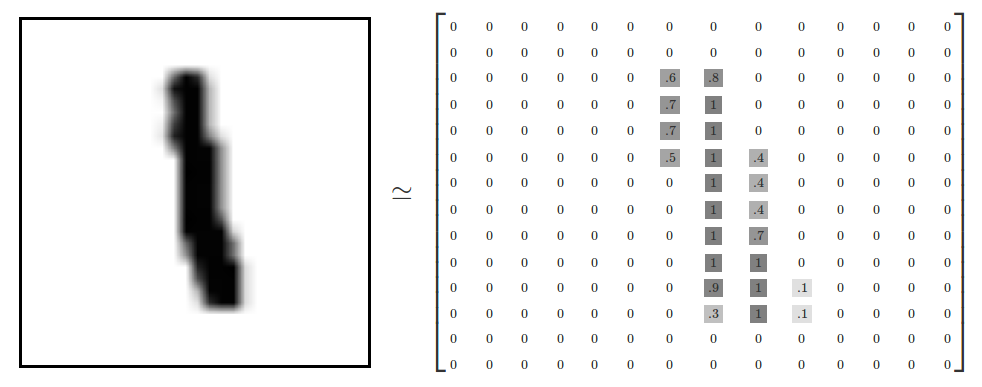

Typically when you read in a color image, it has three dimensional shape, width, height and color channels. 

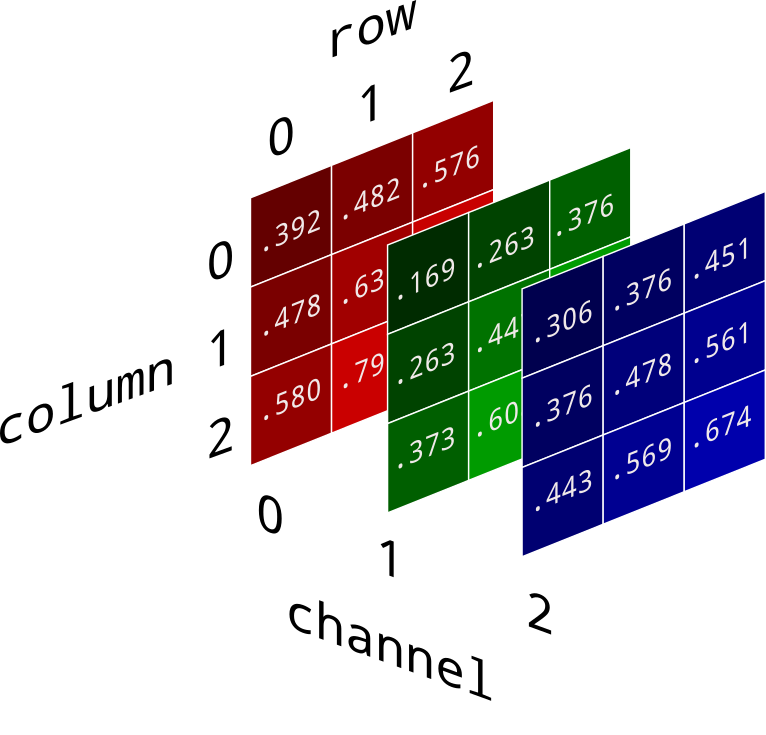


# Indexing on an image



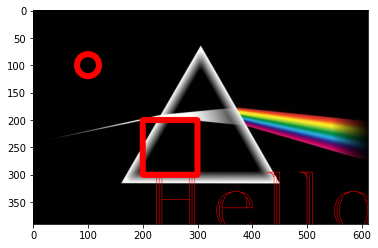

In [ ]:
prism.shape
plt.imshow(prism)

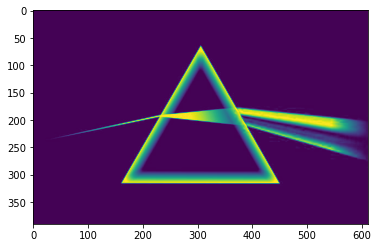

In [ ]:
prism_red = prism[:,:,0]
prism_green = prism[:,:,1]
prism_blue = prism[:,:,2]

plt.imshow(prism_red)


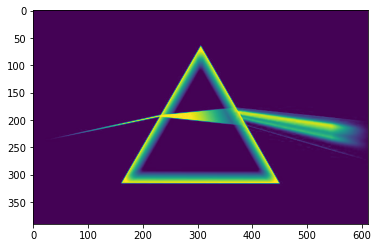

In [ ]:
plt.imshow(prism_green)


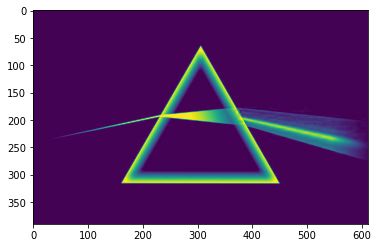

In [ ]:
plt.imshow(prism_blue)

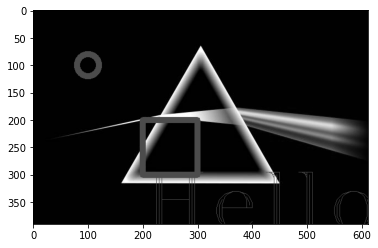

In [ ]:
prism2 = cv2.cvtColor(prism, cv2.COLOR_RGB2GRAY)
plt.imshow(prism2, cmap = 'gray')

In [ ]:
prism2.shape

(390, 612)

### **Basic Image Operations**
There are a couple of ways to manipulate images that we will go over. Today, we will just go over blending images.


In [ ]:
uploaded = files.upload()


Saving dog.jpeg to dog.jpeg


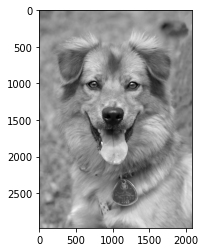

In [ ]:
dog = cv2.imread('dog.jpeg')
plt.imshow(dog)

In [ ]:
uploaded = files.upload()

Saving Copyright.png to Copyright.png


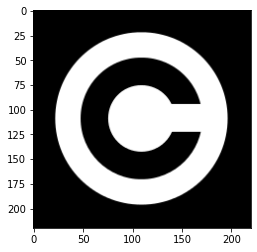

In [ ]:
Copyright = cv2.imread('Copyright.png')
plt.imshow(Copyright)

In [ ]:
dog.shape

(2975, 2082, 3)

In [ ]:
dog.shape
dog2 = cv2.resize(dog, (220, 220))
Copyright.shape

(220, 220, 3)

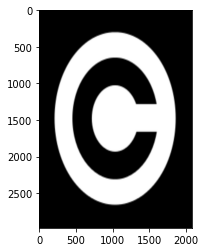

In [ ]:
copyright_big = cv2.resize(Copyright, (2082, 2975))
plt.imshow(copyright_big)

In [ ]:
dog2.shape

NameError: ignored

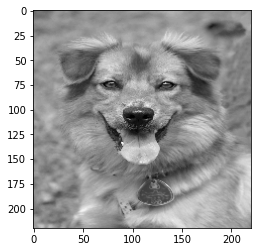

In [ ]:
dog2.shape
plt.imshow(dog2)

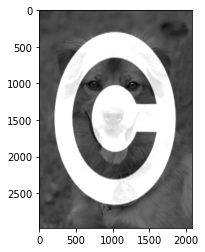

In [ ]:
blend = cv2.addWeighted(src1 = copyright_big, alpha = .8, src2 = dog, beta = .5, gamma = 0)
plt.imshow(blend)

# Creating a Region of Interest and Adding an image onto it. 

First we find a piece of the bigger image, the dog image that is the same size as the mask. 

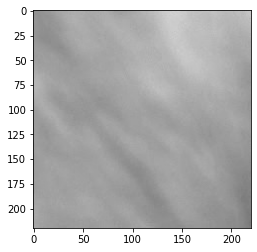

In [ ]:
# Create region of interest
x_off = 2975 -220
y_off = 2082 - 220
roi = dog[x_off:2975, y_off:2082]
plt.imshow(roi)

We confirm that it is the same size.

In [ ]:
roi.shape

(220, 220, 3)

To create the mask, we convert it to a grayscale image. 

Here we add the region of interest and the mask together. 

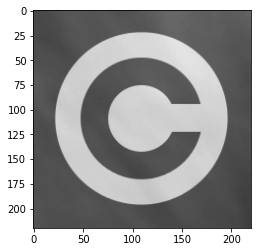

In [ ]:
final_roi = cv2.addWeighted(src1 = Copyright, alpha = .5, src2 = roi, beta = .5, gamma = 0)
plt.imshow(final_roi)

In [ ]:
final_roi.shape

(220, 220, 3)

In [ ]:
dog.shape

(2975, 2082, 3)

In [ ]:
y_off

1862

In [ ]:
x_off

2755

# Lastly, we reinsert the edited image into our final large image. 

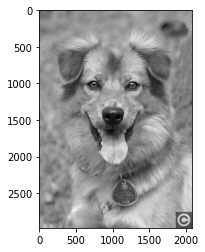

In [ ]:
dog[x_off:x_off+final_roi.shape[0], y_off:y_off+final_roi.shape[1]] = final_roi
plt.imshow(dog)